# Requirements

In [ ]:
!pip3 install numpy scipy matplotlib 

# Solve for state-space model:

$a_{k}y^{(k)} + a_{k-1}y^{(k-1)} + \dots + a_2 y'' + a_1 y' + a_0 y' = b_0$

desired output:

$\left[\begin{matrix}y'\\y''\\\vdots\\y^{(k)}\end{matrix}\right] = 
\left[\begin{matrix}0&1&0&\dots&0&0\\0&0&1&\dots&0&0\\0&0&0&\dots&0&0\\\vdots&\vdots&\vdots&\ddots&\vdots&\vdots\\0&0&0&\dots&0&1\\-\frac{a_0}{a_k}&-\frac{a_1}{a_k}&-\frac{a_2}{a_k}&\dots&-\frac{a_{k-1}}{a_k}&-\frac{a_{k-1}}{a_k}\end{matrix}\right] \cdot
\left[\begin{matrix}y\\y'\\y''\\\vdots\\y^{(n-2)}\\y^{(n-1)}\end{matrix}\right] + 
\left[\begin{matrix}0\\0\\0\\\vdots\\0\\\frac{1}{a_k}\end{matrix}\right] b_0$

In [0]:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt

from typing import Tuple

In [0]:
def constructStateSpace(coefficients:np.ndarray) -> (np.ndarray, np.ndarray):
    """
    
    degree = len(coefficients)
    :param coefficients: 1 dimensional array in format [ak a(k-1) ... a0] 
    :return: state matrix ([degree-2]x[degree-2]) and input matrix [degree-2]x[1]
    """
    if len(coefficients.shape) != 1:
        raise ValueError("coefficients are expected to be passed as 1 dimensional array")
    deg = len(coefficients)
    
    input_matrix =np.zeros((deg-1))
    input_matrix[-1] = 1/coefficients[0] # normalize coefficient of input
    
    coefficients = coefficients[1:]/coefficients[0] # normalize coefficients
    coefficients = np.flip(coefficients) # flip coefficients before adding to matrix
    
    state_matrix = np.zeros((deg-1, deg-1))
    state_matrix[-1, 0:] = -coefficients
    state_matrix[:-1, 1:] = np.eye(deg-2)
    
    
    return state_matrix, input_matrix

def constructLabels(var:str, cnt:int) -> Tuple[str]:
    # Utility function to make labels.
    # Ex: var = x, cnt = 2. Return = ("x", "x'")
    res = []
    for i in range(0, cnt):
        res.append(f"""{var}{"'"*i}""")
    return tuple(res)

In [3]:
from math import sin
coefs = np.asarray([1, 2, 2])
b0 = np.random.rand()
state_m,input_m =  constructStateSpace(coefs)
def input_func(x,t):
    return 3*sin(t)
print("Coefficients: ", coefs)
print("State:\n", state_m, "\ninput_matrix:\n", input_m)

Coefficients:  [1 2 2]
State:
 [[ 0.  1.]
 [-2. -2.]] 
input_matrix:
 [0. 1.]


# Solve ODE

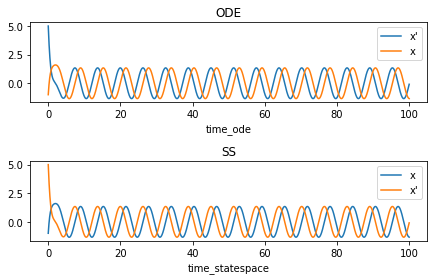

In [10]:
def StateSpace(x,t):
    return state_m.dot(x) + input_m * input_func(x,t)

n = len(coefs) 
def LinODE(x, t):
    dx = np.zeros(n-1)
    dx[0] = state_m[-1].dot(x) + input_func(x,t)
    dx[1:] = x[0:(n-2)]
    return dx

time = np.linspace(0,100,10000)
x0 = np.asarray([-1, 5])

solution = odeint(StateSpace, x0, time)

solution_ode = odeint(LinODE, np.flip(x0), time)


plt.subplot(2,1,1)
plt.title("ODE")
lines=plt.plot(time, solution_ode)
plt.legend(lines, reversed(constructLabels("x", len(lines))))
plt.xlabel('time_ode')

plt.subplot(2,1,2)
plt.title("SS")
lines=plt.plot(time, solution)
plt.legend(lines, constructLabels("x", len(lines)))
plt.xlabel('time_statespace')

plt.tight_layout()
plt.show()